# Bagging

Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

birden fazla karar ağacı oluşturuluyor. her bir modelin tahmin sonucunu alıp birlikte değerlendirir. topluluk öğrenme yöntemlerinin girişinde oluyoruz. topluluk öğrenme yöntemleri internal ve external olarak adlandırılır. 

birincisi modellerin kendi içerisinde öğrenme yapısını taşıması Bagging, Random Forest, XGBoost, GBM bunlar kendi içerisinde birden fazla ağaç olması söz konusu 

ikincisi ise birden fazla farklı algoritmaların bir araya gelip bu algoritmaların beraber bir modelleme problemi üzerinde çalışması şeklinde topluluk halinde öğrenilmesi sağlanıyor

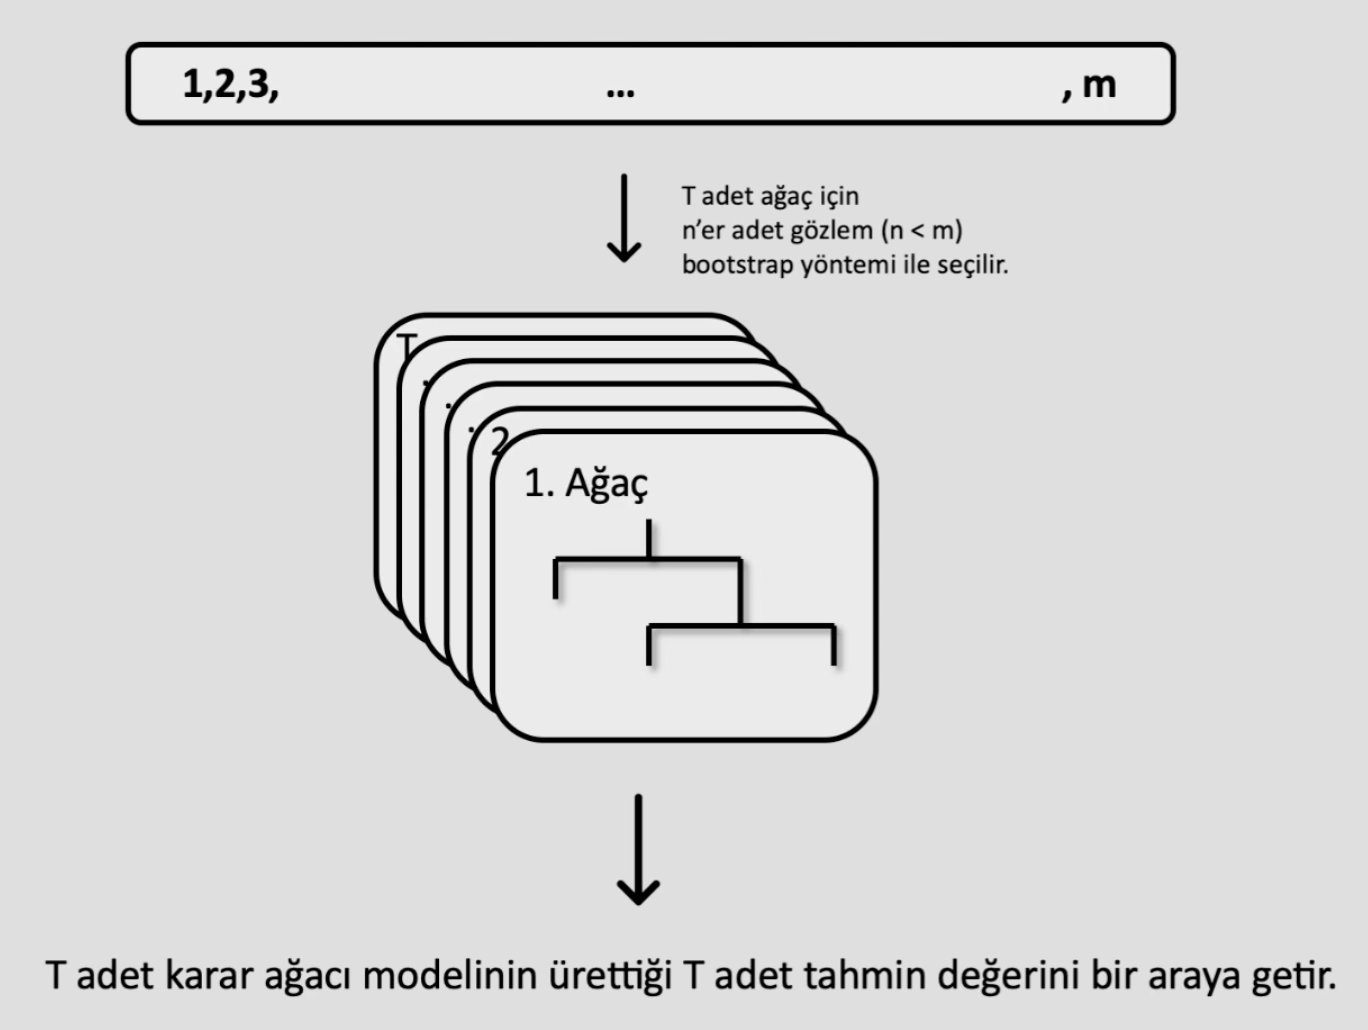

* Bootstrap rastgele örnekleme yöntemini kullanır. örnek veri setinin içerisinden T adet ağaç için m gözlem sayısından küçük sayı olan n kadar gözlem bootstrap yöntemi ile seçilir
* bir örneklememiz var bunun içerisinden yerine koymalı bir şekilde m den daha küçük sayıda gözlemden oluşan T adet ağaç oluşturulur. 
* ana veri setimizin içerisinden bir gözlem seti çekeriz 1. ağaç oluşturulur. bu şekilde devam eder.
* T adet karar ağacı modelinin ürettiği T adet tahmin değerini bir araya getirilir ve model sonucu değerlendirilir.
* buradaki ağaçların daha önceki ağaçlarla bir bağımlılıkları yoktur.
* örneklerin/gözlemlerin her bir ağacın oluşturulmasında kullanılması şansı eşittir.
* çekilen örneklerin 2/3'ü ağaçların oluşturulması geriye kalan kısım ağaçların performansının test edilmesi için kullanılır.
* bagging yöntemi karar ağaçlarına göre hata kareler ortalamasının karekökü değerini düşüren varyansı düşüren ve ezberlemeye karşı dayanıklı olan yöntemdir.
* CART'ın içerisinde bulunan aşırı öğrenme durumunu ağacın yapraklarını budamamıza rağmen yinede bir rassallık problemi ortaya çıkıyordu bu bagging ile giderilmiştir.
* rassallığı sağlar.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.ensemble import BaggingRegressor
# modelimizi oluşturalım
# bootstrap örneklemlerini gözlemlemek için bootstrap_features = True yapalım
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [4]:
# oluşturulan birbirinden farklı ağaçları ifade eden parametre n_estimators'dur. 
bag_model.n_estimators

10

10 tane ağaç oluşturulacak

In [5]:
# bunların her birisi birbirinden farklı ağaçlardır.
bag_model.estimators_

[DecisionTreeRegressor(random_state=1480886914),
 DecisionTreeRegressor(random_state=2032837551),
 DecisionTreeRegressor(random_state=1182474494),
 DecisionTreeRegressor(random_state=1586058154),
 DecisionTreeRegressor(random_state=506780593),
 DecisionTreeRegressor(random_state=382230546),
 DecisionTreeRegressor(random_state=160258204),
 DecisionTreeRegressor(random_state=194078935),
 DecisionTreeRegressor(random_state=41421197),
 DecisionTreeRegressor(random_state=1632306716)]

In [6]:
# her bir ağaçtaki örnekleri/satır gösterir.
# birbirinden farklı indekslerde bulunur
bag_model.estimators_samples_

[array([116,   9,  82,  19, 146,  25, 165, 114, 108, 169, 106, 117,  95,
        165,  11, 194,   5, 135,  97, 174,  74, 110, 136, 185,  49, 143,
        111, 117, 192,  80,  84,  88,  70,  19,  25,  30, 172, 115, 146,
        186, 190, 105,  12, 129,  84,  37, 192, 179,  12, 176, 172,  55,
        169,  79, 172, 188, 137,  62,  42,  30, 192, 146,  79, 135, 148,
        114,  81,   2,  99, 196, 139,  68, 153,  70,  83,  55,   6,  39,
        187,  16,  14,  33, 107, 194, 125,  96, 124,  50, 128,   5,  27,
         32,   1, 175,  26, 123,  13,  23,  74,  18,  77,  12,  36, 104,
        168,  80, 156,  10,  14,  27,  86,  18,  13, 112,  35, 177, 133,
         69, 119, 138, 150,  17, 140, 104, 170, 135,   4,  16,  86, 120,
        113, 117, 163, 134,  58, 134,  77, 154, 182, 137,  48, 190,  76,
        136,  57, 133,  77, 140, 156,  24, 190,  79,   4, 165,  75,  49,
          9, 166,  70,  58, 190, 129,  29, 188, 120, 155,  48, 168,  76,
        111,  71, 128,   3, 104,  83, 166,  12,  27

In [7]:
# her bir ağacın bağımsız değişkenlerine ulaşmak istersek
bag_model.estimators_features_
# bütün ağaçların kullandığı değişkenler ve bunların indekslerine erişmiş olduk

[array([ 2,  8,  1, 11,  8,  1, 16,  6,  2,  6, 15, 11, 17, 17, 10, 16, 13,
        16, 12]),
 array([15, 18,  2, 16,  8, 11,  7, 12,  4,  2,  4,  2,  5,  6,  9, 14, 11,
        11, 10]),
 array([10,  9, 11,  2, 13,  8,  9,  5,  1,  8, 10,  5, 10,  5,  3, 17,  0,
         4,  3]),
 array([10, 12,  5,  1, 18,  9,  8, 10,  8,  4,  5,  1,  4, 14,  8, 14,  3,
         3,  5]),
 array([17, 14,  9,  4,  4,  7,  3,  8,  8,  5,  8, 11, 11, 11,  0,  2, 17,
        17, 11]),
 array([18, 12,  2, 10, 12, 18, 15,  7,  8,  6, 11, 16, 14, 17, 15, 13,  6,
         7, 11]),
 array([ 1,  5,  1, 13,  9, 17, 13,  0, 14,  4,  6, 12,  9,  7, 18, 14, 14,
         7, 16]),
 array([17,  4, 10, 10, 11,  8,  8,  2,  9, 14, 12,  5,  6, 17,  0, 10,  2,
        17, 15]),
 array([13,  7,  7, 18,  2, 14,  2,  1,  1, 15,  2, 16,  9,  3,  1,  2,  7,
         3,  0]),
 array([12, 17,  7,  7,  6,  8, 14,  3, 10, 11, 14,  7,  7,  4, 17, 17, 11,
        12, 17])]

In [9]:
# bilgilerin gözükmesi için
from sklearn import set_config
set_config(print_changed_only=False)

In [10]:
# her bir modele özel değerlere erişmeye çalışalım
# birinci modelin özellikleri
bag_model.estimators_[0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, random_state=1480886914,
                      splitter='best')

# Bagging -  Tahmin

In [11]:
y_pred = bag_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

327.6695986870288

bu elde ettiğimiz değerler topluluğun her birisinin verdiği tahminleri bir araya getirerek oluşturulan tahminlerdi. öyle bir amacımızın olduğunu düşünelim ki buradaki birkaç ağaca gidip onların değerlerine bakalım. hatalara odaklanarak optimizasyon işlemine bakalım.

Ağaçların her birisine ayrı ayrı erişip her bir ağaç için hataları inceleyebiliriz.

In [13]:
# ikinci ağaca bakalım
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test,iki_y_pred))

475.02382588206706

In [16]:
# 7. ağaca bakalım
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

453.4160294053321

Random Forest'da kötü ağaçlara düşük katsayılar verilecek.

# Bagging -  Model Tuning

Bagging'i aslında bir metodoloji olarak görmek gerekiyor. Bag etmek yani bootstrap birleştirmeleri yapmak anlamına gelir. bu metodolojiyi herhangi bir ağaç yöntemine uyguladığınızda o ağacı bag etmiş oluruz örneğin Bagging metodolojisini CART'a uygulandığımızda birde farklı olarak değişken seçimlerine de random subspace yöntemini getirdiğimizde Random Forest yapmış oluruz.

GridSearchCV yaklaşımıyla bir tahminci sayısını değiştirelim

In [18]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [19]:
# oluşturulan birbirinden farklı ağaçları ifade eden parametre n_estimators'dur. 
bag_params = {"n_estimators": range(2,20)}

In [20]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv=10)

In [21]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             n_jobs=None, param_grid={'n_estimators': range(2, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
# optimum tahminci sayısını 14 olarak belirlemiş oldu.
bag_cv_model.best_params_

{'n_estimators': 18}

In [23]:
# final modelimizi oluşturalım
# her seferinde farklı değerler oluşturmasın diye random_state tanımladım.
bag_tuned = BaggingRegressor(n_estimators=18, random_state=45)

In [24]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=18,
                 n_jobs=None, oob_score=False, random_state=45, verbose=0,
                 warm_start=False)

In [25]:
# final modelimizin test hatasını gözlemleyelim
y_pred = bag_tuned.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

338.6015890705578

bagging ile şu anda bütün modelleri göz önünde bulundurduğumuzda bagging'nin hatası en düşük oldu. bu her zaman böyle olacak diye düşünülemez.